# Tarefa: Implementando Regressão Linear do Zero

Aluna: Lorena Santos Pereira

A tarefa consiste em fazer uma implementação com base no vídeo abaixo e depois realizar algumas modificações sobre o algoritmo.
* [How to Do Linear Regression using Gradient Descent](https://www.youtube.com/watch?v=XdM6ER7zTLk)


##  - Implementação base

In [5]:
import numpy as np


def compute_error_for_given_points(b, m, points):
    total_error = 0

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_error += (y - (m * x + b)) ** 2

    return total_error / float(len(points))


def step_gradient(current_b, current_m, points, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2 / N) * (y - ((current_m * x) + current_b))
        m_gradient += -(2 / N) * x * (y - ((current_m * x) + current_b))

    # Se o gradiente é negativo queremos aumentar o valor do coeficiente.
    # Se positivo, queremos diminuir. Logo, subtrair a multiplicação entre
    # a taxa de aprendizado e o gradiente dos respectivos valores atuais dos
    # coeficientes garante esse comportamento. Não foi preciso fazer if.
    new_b = current_b - (learning_rate * b_gradient)
    new_m = current_m - (learning_rate * m_gradient)

    return [new_b, new_m]


def gradient_descent_runner(points, learning_rate, starting_b, starting_m, num_iterations):
    b = starting_b
    m = starting_m

    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)

    return [b, m]

def run():
    points = np.genfromtxt('../datasets/data.csv', delimiter=',')

    learning_rate = 0.0001

    # Coeficiente linear
    initial_b = 0

    # Coeficiente angular
    initial_m = 0

    num_iterations = 1000

    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".
            format(initial_b, initial_m,
            compute_error_for_given_points(initial_b, initial_m, points)))

    print("Running...")

    [b, m] = gradient_descent_runner(points, learning_rate, initial_b, initial_m, num_iterations)

    print("After {0} iterations b = {1}, m = {2}, error = {3}".
            format(num_iterations, b, m,
            compute_error_for_given_points(b, m, points)))

if __name__ == '__main__':
    run()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1000 iterations b = 0.08893651993741346, m = 1.4777440851894448, error = 112.61481011613473


##  - Modificando o conjunto de dados para *income.csv*

In [6]:
import numpy as np


def compute_error_for_given_points(b, m, points):
    total_error = 0

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_error += (y - (m * x + b)) ** 2

    return total_error / float(len(points))

def step_gradient(current_b, current_m, points, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2 / N) * (y - ((current_m * x) + current_b))
        m_gradient += -(2 / N) * x * (y - ((current_m * x) + current_b))

    new_b = current_b - (learning_rate * b_gradient)
    new_m = current_m - (learning_rate * m_gradient)

    return [new_b, new_m]

def gradient_descent_runner(points, learning_rate, starting_b, starting_m, num_iterations):
    b = starting_b
    m = starting_m

    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)

    return [b, m]

def run():
    points = np.genfromtxt('../datasets/income.csv', delimiter=',')

    learning_rate = 0.0001

    # Coeficiente linear
    initial_b = 0

    # Coeficiente angular
    initial_m = 0

    num_iterations = 1000

    print("- For dataset income.csv")
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".
            format(initial_b, initial_m,
            compute_error_for_given_points(initial_b, initial_m, points)))

    print("Running...")

    [b, m] = gradient_descent_runner(points, learning_rate, initial_b, initial_m, num_iterations)

    print("After {0} iterations b = {1}, m = {2}, error = {3}".
            format(num_iterations, b, m,
            compute_error_for_given_points(b, m, points)))

if __name__ == '__main__':
    run()
    

- For dataset income.csv
Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
After 1000 iterations b = -0.18234255376510086, m = 3.262182267596014, error = 103.39842291729676


##  - Imprimir o RSS a cada iteração

In [14]:
import numpy as np


def compute_error_for_given_points(b, m, points):
    total_error = 0

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_error += (y - (m * x + b)) ** 2

    return total_error / float(len(points))

def step_gradient(current_b, current_m, points, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2 / N) * (y - ((current_m * x) + current_b))
        m_gradient += -(2 / N) * x * (y - ((current_m * x) + current_b))

    new_b = current_b - (learning_rate * b_gradient)
    new_m = current_m - (learning_rate * m_gradient)

    return [new_b, new_m]

def gradient_descent_runner(points, learning_rate, starting_b, starting_m, num_iterations):
    b = starting_b
    m = starting_m
    iterations_rss = []

    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)
        rss = compute_error_for_given_points(b, m, points)
        print("When iteration = {0} RSS = {1}".format(i, rss))
        iterations_rss.append([int(i), rss])

    np.savetxt("../datasets/iterations_rss.csv", iterations_rss, delimiter=",", fmt='%i,%10.6f')
    return [b, m]

def run():
    points = np.genfromtxt('../datasets/data.csv', delimiter=',')

    learning_rate = 0.0001

    # Coeficiente linear
    initial_b = 0

    # Coeficiente angular
    initial_m = 0

    num_iterations = 1000
    
    print("- For dataset income.csv")
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".
            format(initial_b, initial_m,
            compute_error_for_given_points(initial_b, initial_m, points)))

    print("Running...")

    [b, m] = gradient_descent_runner(points, learning_rate, initial_b, initial_m, num_iterations)

    print("After {0} iterations b = {1}, m = {2}, error = {3}".
            format(num_iterations, b, m,
            compute_error_for_given_points(b, m, points)))

if __name__ == '__main__':
    run()
    

- For dataset income.csv
Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
When iteration = 0 RSS = 1484.586557408649
When iteration = 1 RSS = 457.8542575737673
When iteration = 2 RSS = 199.50998572553894
When iteration = 3 RSS = 134.50591058200533
When iteration = 4 RSS = 118.14969342239947
When iteration = 5 RSS = 114.0341490603815
When iteration = 6 RSS = 112.99857731713661
When iteration = 7 RSS = 112.7379818756847
When iteration = 8 RSS = 112.67238435909097
When iteration = 9 RSS = 112.65585181499746
When iteration = 10 RSS = 112.65166489759584
When iteration = 11 RSS = 112.65058436150113
When iteration = 12 RSS = 112.65028544701505
When iteration = 13 RSS = 112.6501832029397
When iteration = 14 RSS = 112.65013044507197
When iteration = 15 RSS = 112.65009013922885
When iteration = 16 RSS = 112.65005296694635
When iteration = 17 RSS = 112.65001658353181
When iteration = 18 RSS = 112.64998039901862
When iteration = 19 RSS = 112.64994426496074
When itera

When iteration = 484 RSS = 112.63320865795575
When iteration = 485 RSS = 112.63317279385461
When iteration = 486 RSS = 112.63313693029484
When iteration = 487 RSS = 112.6331010672764
When iteration = 488 RSS = 112.63306520479948
When iteration = 489 RSS = 112.63302934286374
When iteration = 490 RSS = 112.63299348146946
When iteration = 491 RSS = 112.63295762061645
When iteration = 492 RSS = 112.6329217603048
When iteration = 493 RSS = 112.63288590053456
When iteration = 494 RSS = 112.63285004130556
When iteration = 495 RSS = 112.63281418261776
When iteration = 496 RSS = 112.63277832447147
When iteration = 497 RSS = 112.63274246686646
When iteration = 498 RSS = 112.6327066098026
When iteration = 499 RSS = 112.63267075328005
When iteration = 500 RSS = 112.63263489729884
When iteration = 501 RSS = 112.63259904185881
When iteration = 502 RSS = 112.63256318696007
When iteration = 503 RSS = 112.63252733260256
When iteration = 504 RSS = 112.63249147878636
When iteration = 505 RSS = 112.632455

## - O que acontece com o RSS ao longo das iterações?

O valor do RSS diminui ao longo das 1000 iterações. Após a 6 iteração ele apresenta uma estabilidade em torno do número 112. 

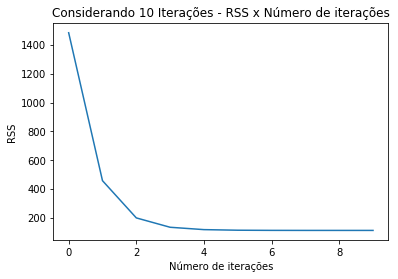

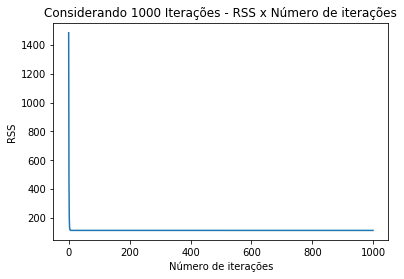

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline


import numpy as np

iterations_rss = np.genfromtxt("../datasets/iterations_rss.csv", delimiter=",", dtype=None)

x = []
y = []

for i in iterations_rss:
    x.append(i[0])
    y.append(i[1])

plt.plot(x[:10], y[:10])
plt.title('Considerando 10 Iterações - RSS x Número de iterações')
plt.xlabel('Número de iterações')
plt.ylabel('RSS')
plt.show()

plt.plot(x[:], y[:])
plt.title('Considerando 1000 Iterações - RSS x Número de iterações')
plt.xlabel('Número de iterações')
plt.ylabel('RSS')
plt.show()


## - Ajustes para que w0 e w1 sejam aproximadamente iguais a -39 e 5 respectivamente

In [ ]:
import numpy as np


def compute_error_for_given_points(b, m, points):
    total_error = 0

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_error += (y - (m * x + b)) ** 2

    return total_error / float(len(points))

def step_gradient(current_b, current_m, points, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2 / N) * (y - ((current_m * x) + current_b))
        m_gradient += -(2 / N) * x * (y - ((current_m * x) + current_b))

    new_b = current_b - (learning_rate * b_gradient)
    new_m = current_m - (learning_rate * m_gradient)

    return [new_b, new_m]

def gradient_descent_runner(points, learning_rate, starting_b, starting_m, num_iterations):
    b = starting_b
    m = starting_m
    iterations_rss = []

    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)
        rss = compute_error_for_given_points(b, m, points)
        print("When iteration = {0} RSS = {1}".format(i, rss))
        iterations_rss.append([int(i), rss])

    np.savetxt("../datasets/iterations_rss.csv", iterations_rss, delimiter=",", fmt='%i,%10.6f')
    return [b, m]

def run():
    points = np.genfromtxt('../datasets/data.csv', delimiter=',')

    learning_rate = 0.0001

    # Coeficiente linear
    initial_b = 0

    # Coeficiente angular
    initial_m = 0

    num_iterations = 1000
    
    print("- For dataset income.csv")
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".
            format(initial_b, initial_m,
            compute_error_for_given_points(initial_b, initial_m, points)))

    print("Running...")

    [b, m] = gradient_descent_runner(points, learning_rate, initial_b, initial_m, num_iterations)

    print("After {0} iterations b = {1}, m = {2}, error = {3}".
            format(num_iterations, b, m,
            compute_error_for_given_points(b, m, points)))

if __name__ == '__main__':
    run()
    